## Algorithm:
1. Randomly assign k centers.
2. Calculate the distance of all the points from all the K centres and allocate the points to cluster based on the shortest distance. The model’s inertia is the mean squared distance between each instance and its closest centroid. The goal is to have a model with the lowes intertia.
3. Once all the points are assigned to clusters, recompute the centroids.
4. Repeat the steps 2 and 3 until the locations of the centroids stop changing and the cluster allocation of the points becomes constant.

In [1]:
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc('image', cmap = 'gray')
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = r_[10*randn(1000, 2) + array([70, 30]),
         10*randn(1000, 2) + array([10, 10]),
         10*randn(1000, 2) + array([50, 80])]
data = data[pyrandom.sample(range(len(data)), len(data))]

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame(data, columns = ['Unit_1-Marks', 'Unit_2-Marks'])
df

,Unit_1-Marks,Unit_2-Marks
0,9.538611,3.788522
1,73.857351,20.475778
2,49.844439,74.372392
3,49.884127,83.361085
4,54.697766,76.392509
...,...,...
2995,61.212281,85.473739
2996,45.291992,75.325156
2997,60.587616,35.695851
2998,42.518940,84.746656


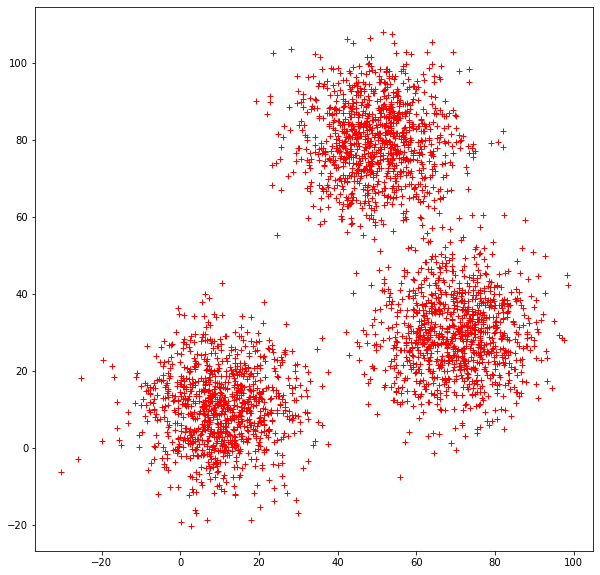

In [5]:
figsize(10, 10)
plot(data[:, 0], data[:, 1], 'r+')

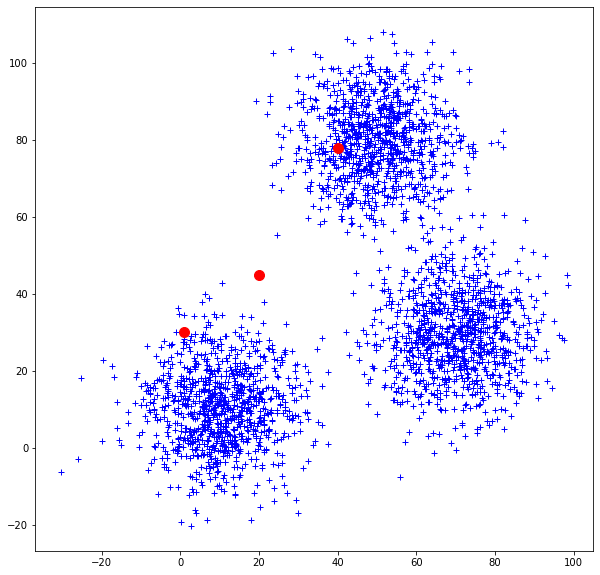

In [6]:
protos = array([[1, 30], [20, 45], [40, 78]]) #initialize centroids
start = protos.copy()

figsize(10, 10)
plot(data[:, 0], data[:, 1], 'b+')
plot(protos[:, 0], protos[:, 1], 'ro', markersize = 10)

Obviously, those centers are wrong. But lets keep going.
Now we compute the assignment of the data points to the prototypes (array Closest). This is also wrong but we are going to use it anyway

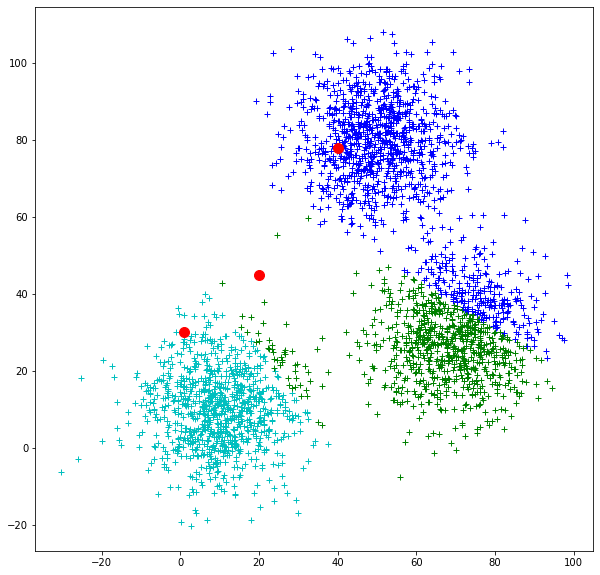

In [7]:
figsize(10, 10)
dists = cdist(protos, data)
closest = argmin(dists, axis = 0)
for i in range(len(protos)):
    plot(data[closest==i, 0], data[closest==i, 1], ['c+', 'g+', 'b+', 'y+'][i])
plot(protos[:, 0], protos[:, 1], 'ro', markersize = 10)

In [8]:
history = [protos.copy()]
for i in range(len(protos)):
    protos[i,:] = average(data[closest==i], axis = 0)
history.append(protos.copy())

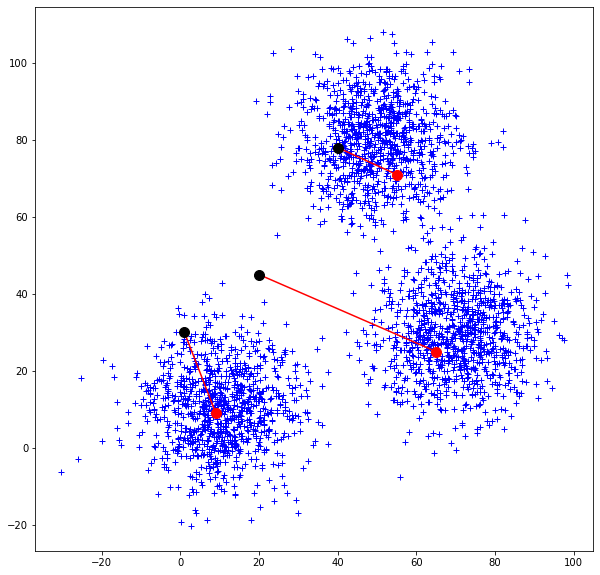

In [9]:
#Plotting the centroid movements
figsize(10, 10)
plot(data[:, 0], data[:, 1], 'b+')
harray = array(history)
for i in range(len(protos)):
    plot(harray[:, i, 0], harray[:, i, 1], 'r')
plot(harray[0,:, 0], harray[0,:, 1], 'ko', markersize = 10)
plot(protos[:, 0], protos[:, 1], 'ro', markersize = 10)

As you can see the center have moved. And looks like it have moved in the right direction. 
Now lets just repeat this process multiple times

In [10]:
for round in range(1000):
    if round % 100 == 0: sys.stderr.write('%d '%round)
    dists = cdist(protos, data)
    closest = argmin(dists, axis = 0)
    for i in range(len(protos)):
        protos[i,:] = average(data[closest==i], axis = 0)
    history.append(protos.copy())

0 100 200 300 400 500 600 700 800 900 

We can now plot the path the prototype guesses have taken

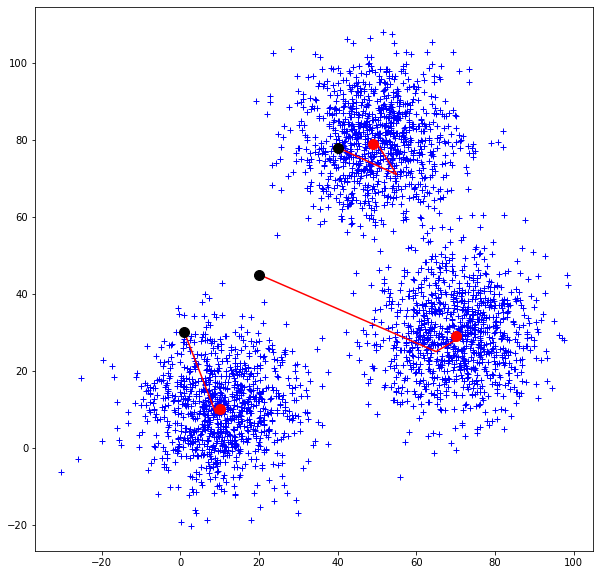

In [11]:
figsize(10, 10)
plot(data[:, 0], data[:, 1], 'b+')
history = array(history)
for i in range(len(protos)):
    plot(history[:, i, 0], history[:, i, 1], 'r')
plot(history[0,:, 0], history[0,:, 1], 'ko', markersize = 10)
plot(protos[:, 0], protos[:, 1], 'ro', markersize = 10)

As you can see the final location of the prototype centers (red) are nicely in the center of the classes. The algorithm doesnt gives exactly the cluster centers because there are 3 clusters but we postulated 4 cluster centers.
We can also look at the partition of the data induced by these cluster centers.

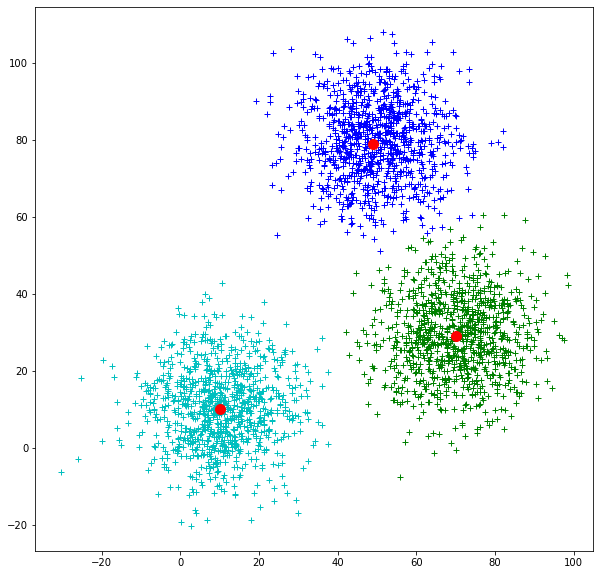

In [12]:
figsize(10, 10)
dists = cdist(protos, data)
closest = argmin(dists, axis = 0)
for i in range(len(protos)):
    plot(data[closest==i, 0], data[closest==i, 1], ['c+', 'g+', 'b+', 'y+'][i])
plot(protos[:, 0], protos[:, 1], 'ro', markersize = 10)

The diagram above shows the step by step implementation of K means clustering. An optimum value of k is obtained by elbow method.

## Elbow method

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
dataset=pd.read_csv('Mall_customers.csv')

In [16]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [17]:
#dataset
X =dataset[['Annual Income (k$)','Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


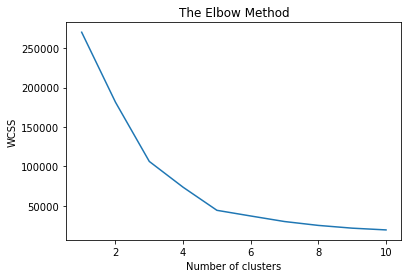

In [18]:
#Elbow method
from sklearn.cluster import KMeans

wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [20]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


## Model Evaluation

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
silhouette_score(X,y_kmeans)

0.553931997444648

### Sample prediction

In [23]:
# It predicts the cluster number to which the datapoint belongs to
test=kmeans.predict(np.asarray([[17,40]]))
test[0]

3

In [24]:
# Keep same cluster customers in seperate dataset
cluster_4_customers= X[y_kmeans==4]
print (cluster_4_customers)

     Annual Income (k$)  Spending Score (1-100)
124                  70                      29
128                  71                      11
130                  71                       9
134                  73                       5
136                  73                       7
138                  74                      10
140                  75                       5
144                  77                      12
146                  77                      36
148                  78                      22
150                  78                      17
152                  78                      20
154                  78                      16
156                  78                       1
158                  78                       1
160                  79                      35
162                  81                       5
164                  85                      26
166                  86                      20
168                  87                 

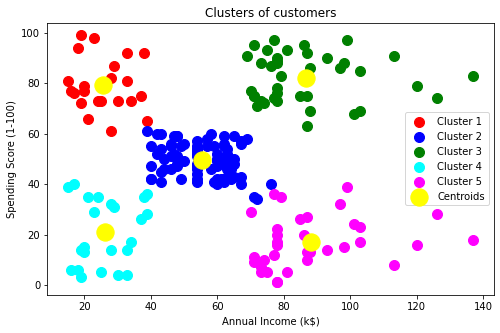

In [25]:
# Visualising the clusters
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [26]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [28]:
# MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit_predict(X)

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4,
       0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])